# Linda Li
## ANLY-590-02 HW1

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%pylab inline

# print errors to console
np.seterr('print') 

# change printing precision for numpy variables
np.set_printoptions(precision=4)

Populating the interactive namespace from numpy and matplotlib


# 1 Feedforward: Building a ReLu 2 Layer neural network

1. 

Below is a network with:

    -  2 inputs,

    -  2 hidden layers (where the first layer contains 3 hidden units and the
    second contains 2 hidden units) and a

    -  3-class output (uses a $\texttt{softmax}$ function)
    
    Bias terms are not included in the diagram.

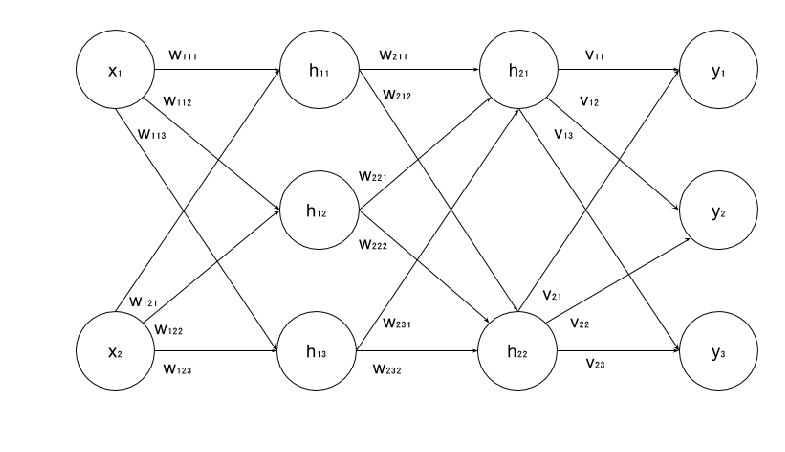

In [2]:
# plot neural network with above requirements
plt.figure(dpi=150)
plt.axis('off')
plt.imshow(mpimg.imread('HW1NN.png'))
plt.show()

2.

Let 
$$W^{(1)}=\begin{bmatrix}
w_{111} & w_{121}\\
w_{112} & w_{122}\\
w_{113} & w_{123}\end{bmatrix}\text{, } W^{(2)}=\begin{bmatrix}
w_{211}& w_{221} & w_{231}\\
w_{212}& w_{222} & w_{232}
\end{bmatrix}\text{, } V=\begin{bmatrix}v_{11} & v_{21}\\
v_{12} & v_{22}\\
v_{13} & v_{23}\end{bmatrix}$$

$$b^{(1)}=\begin{bmatrix}
b_{11} \\ b_{12} \\ b_{13} 
\end{bmatrix}\text{, } 
b^{(2)}=\begin{bmatrix} b_{21}\\
b_{22}\end{bmatrix}\text{, } 
c=\begin{bmatrix} c_{1} \\ 
c_{2} \\
c_{3} \end{bmatrix}$$

and

$$X=\begin{bmatrix}
x_1 \\ 
x_2 \end{bmatrix}.$$

The output of the first hidden layer:

$$\max(0,W^{(1)}X
+b^{(1)})$$

The output of the second hidden layer:

$$\max(0,W^{(2)}\max(0,W^{(1)}X
+b^{(1)})+b^{(2)})$$

The mathematical equation for this network:

$$\frac{\exp(V\max(0, W^{(2)}\max(0,W^{(1)}X
+b^{(1)})+b^{(2)})+c)}
{\begin{bmatrix}1&1&1\end{bmatrix}(\exp(V\max(0, W^{(2)}\max(0,W^{(1)}X
+b^{(1)})+b^{(2)})+c)}$$

where $\max$ and $\exp$ are applied entry-wise.

3.

In [3]:
# code up the above network
def ff_nn_2_ReLu(X, W1, W2, b1, b2, V, c):
    l1 = np.maximum(0, np.matmul(W1, X)+b1)
    l2 = np.maximum(0, np.matmul(W2, l1)+b2)
    i3 = np.matmul(V, l2)+c
    i3 = i3 - np.max(i3)
    return np.exp(i3)/sum(np.exp(i3), axis=0) # stable softmax

4.

Suppose we have the following set of weight matrices:

$$W^{(1)}=\begin{bmatrix}1 & 0\\
-1 & 0\\
0 & 0.5\end{bmatrix} 
\text{, } 
W^{(2)}=\begin{bmatrix}1 & 0 & 0\\
-1 &-1 & 0\end{bmatrix}
\text{, }  
V=\begin{bmatrix} 1 & 1\\
0 & 0\\
-1 &-1\end{bmatrix}$$


$$b^{(1)}=\begin{bmatrix} 0 \\
0 \\
1 \end{bmatrix}
\text{, } 
b^{(2)}=\begin{bmatrix} 1 \\
-1 \end{bmatrix}
\text{, } 
c=\begin{bmatrix} 1 \\
0 \\
0 \end{bmatrix}$$

and inputs:

$$X=\begin{bmatrix}1&0&0\\-1&-1&1\end{bmatrix}$$

We can use the above function to compute the class probabilities associated with the forward pass of each sample.

In [4]:
# code up weight matrices
W1 = np.array([[1, 0], [-1, 0], [0, 0.5]])
W2 = np.array([[1, 0, 0], [-1, -1, 0]])
V = np.array([[1, 1], [0, 0], [-1, -1]])
b1 = np.array([0, 0, 1]).reshape((3,1))
b2 = np.array([1, -1]).reshape((2,1))
c = np.array([1, 0, 0]).reshape((3,1))

# code up input
X = np.array([[1, 0, 0], [-1, -1, 1]])

# compute class probabilities
# p_{i,j}, i-th class, j-th sample input
ff_nn_2_ReLu(X, W1, W2, b1, b2, V, c)

array([[0.9465, 0.8438, 0.8438],
       [0.0471, 0.1142, 0.1142],
       [0.0064, 0.042 , 0.042 ]])

# 2 Gradient Descent

The Rosenbrock function is a famous non-convex function that is used to explore optimization algorithms.

$$f(x, y) = (1 - x)^2 + 100 (y - x^2)^2$$

1.

The partial derivatives of $f$ are:

$\frac{\partial f}{\partial x}=2(1-x)(-1)+200(y-x^2)(-2x)=400x^3-400xy+2x-2$

$\frac{\partial f}{\partial y}=200(y-x^2)$

2.

Below is a visualization of the contours of the Rosenbrock function.

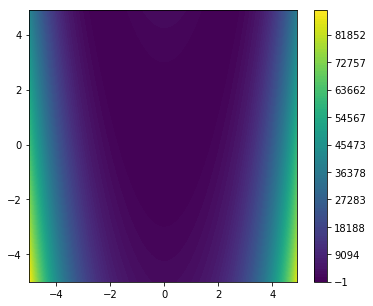

In [5]:
# computes above Rosenbrock function
def f(vector):
    x, y = vector 
    return (1-x)**2+100*(y-x**2)**2

# set up grid values
xylim = 5
delta = .1
x = np.arange(-xylim, xylim, delta)
y = np.arange(-xylim, xylim, delta)
X, Y = np.meshgrid(x, y, sparse=True)

# compute function value for each grid value
Z = f([X, Y])

# plot function as contour plot
fig, ax = plt.subplots(figsize=(6,5))
CS = ax.contourf(x,y,Z,levels=np.linspace(np.min(Z)-1, np.max(Z)+1, 100))
cbar = plt.colorbar(CS)

3.

Let's write a Gradient Descent algorithm for finding the minimum of the function.

In [6]:
# computes gradient for the Rosenbrock function
def grad_f(vector):
    x, y = vector
    df_dx = 400*x**3-400*x*y-2*x-2
    df_dy = 200*(y-x**2)
    return np.array([df_dx, df_dy])

# adapted gradient descent code from lectures
def grad_descent(starting_point=None, iterations=100, learning_rate=.01):
    if starting_point is not None:
        point = starting_point
    else:
        point = np.random.uniform(-.1,.1,size=2)
    
    trajectory = [point]
    fx = [f(point)] # compute function value
    
    for i in range(iterations):
        grad = grad_f(point)
        point = point - learning_rate * grad
        if not np.isfinite(point).all() or not np.isfinite(f(point)).all():
            break
        trajectory.append(point)
        fx.append(f(point)) # store function values
    
    return np.array(trajectory), np.array(fx)

# generate contour plot with trajectory and plot change in function values
def conplot(fig, ax, x, y, Z, traj, fx):
    ax[0].contourf(x,y,Z,levels=np.linspace(np.min(Z)-1, np.max(Z)+1, 100))
    xt = traj[:,0]
    yt = traj[:,1]
    ax[0].plot(xt,yt)
    ax[0].set_ylabel("y")
    ax[0].set_xlabel("x")
    ax[0].set_ylim([np.min(y), np.max(y)])
    ax[0].set_xlim([np.min(x), np.max(x)])
    
    # plot change in function value for each iteration
    ax[1].plot(fx)
    ax[1].set_ylabel("f(x,y)")
    ax[1].set_xlabel("Iteration")
    plt.show()

# run gradient decent and generate plots of trajectory and function values
def gd_plot(x, y, Z, starting_point, iterations=100, learning_rate=.01):
    traj, fx = grad_descent(starting_point, iterations, learning_rate)

    # generate plots
    fig, ax = plt.subplots(1,2, figsize=(12, 5))
    fig.suptitle("Learning Rate "+str(learning_rate)+" Starting from "+str(starting_point)+
                "\nMin found "+"f("+str(traj[-1])+")="+str(fx[-1]))
    conplot(fig, ax, x, y, Z, traj, fx)

 Let's visualize our results for a few different learning rates.

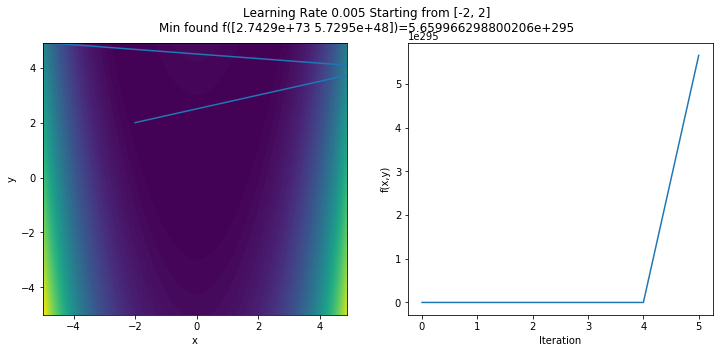

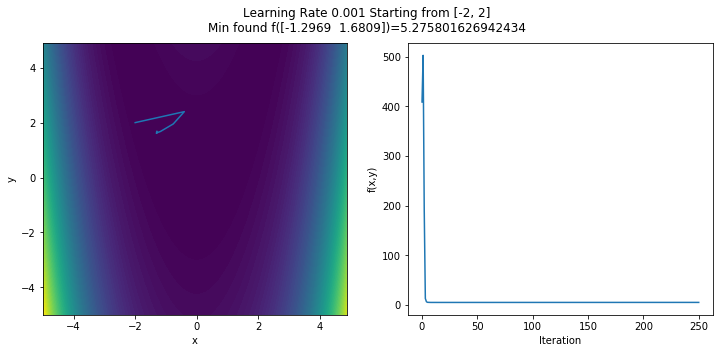

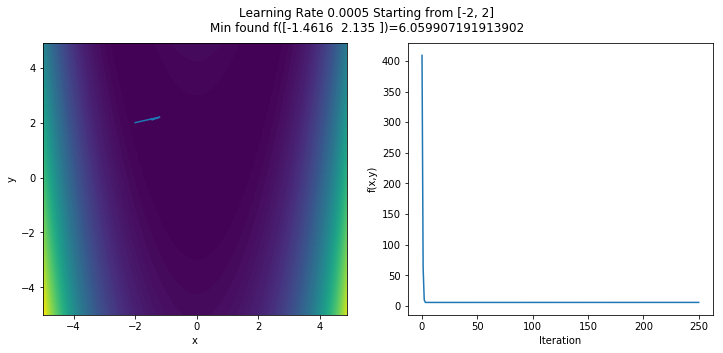

In [7]:
# rates to test
rates = [0.005, .001, 0.0005]

# starting point
point = [-2, 2]

# number of iterations of gradient descent
iterations = 250

# visualize optimization
for r in rates:
    gd_plot(x, y, Z, point, iterations, r)

Using too large of a learning rate causes gradient descent to overstep the minimum. Since this function increases very rapidly, it generates overflow errors. If we use a smaller learning rate, we're less likely to encounter this problem. However, since the function is very flat near the minimum, gradient descent takes very small steps towards the minimum.

4.

Let's write a Gradient Descent with Momentum algorithm for finding the minimum of the function.

In [8]:
# adapted gradient descent with momentum code from lectures
def grad_descent_with_momentum(starting_point=None, iterations=100, alpha=.01, epsilon=.1):
    if starting_point is not None:
        point = starting_point
    else:
        point = np.random.uniform(-.1,.1,size=2)
    
    trajectory = [point]
    fx = [f(point)] # compute function value
    
    v = np.zeros(np.array(point).shape)
    for i in range(iterations):
        grad = grad_f(point)
        v = alpha*v + epsilon*grad
        point = point - v
        if not np.isfinite(point).all() or not np.isfinite(f(point)).all():
            break
        trajectory.append(point)
        fx.append(f(point)) # store function values
    
    return np.array(trajectory), np.array(fx)

# run gradient decent with momentum and generate plots of trajectory and function values
def gdm_plot(x, y, Z, starting_point, iterations=100, alpha=.01, epsilon=.1):
    traj, fx = grad_descent_with_momentum(starting_point, iterations, alpha, epsilon)

    # generate plots
    fig, ax = plt.subplots(1,2, figsize=(12, 5))
    fig.suptitle("Alpha "+str(alpha)+" Epsilon "+str(epsilon)+
                 " Starting from "+str(starting_point)+
                "\nMin found "+"f("+str(traj[-1])+")="+str(fx[-1]))
    conplot(fig, ax, x, y, Z, traj, fx)

Let's visualize our results for a few different settings of the hyperparameters.

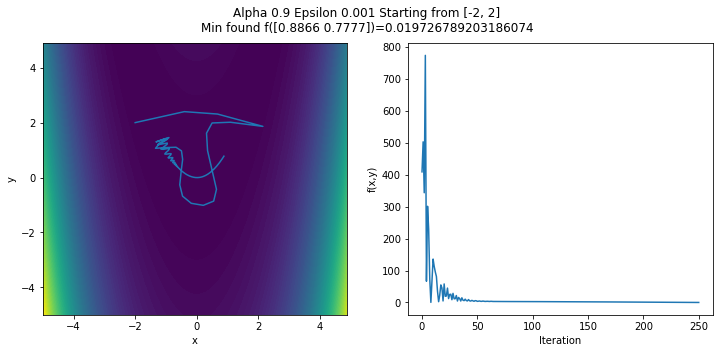

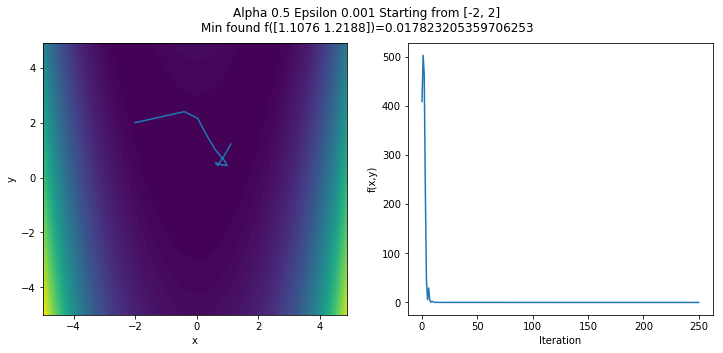

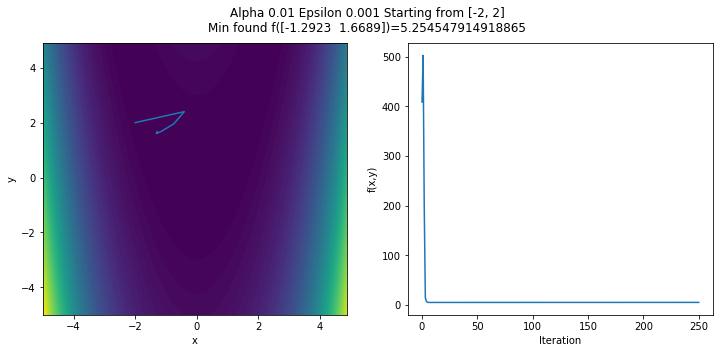

In [9]:
# hyperparameters to test
alphas = [0.9, .5, 0.01]
epsilons = [.001]

# starting point
point = [-2, 2]

# iterations of gradient descent with momentum
iterations = 250

# visualize optimization
for e in epsilons:
    for a in alphas:
        gdm_plot(x, y, Z, point, iterations, a, e)

By adding momentum, we are able to mitigate some of the problems we were experiencing before. However, this is another parameter that we have to play with. Weighting momentum too heavily causes gradient descent to overstep the minimum but not as much as using gradient descent without momentum. If the parameter is set too low, this algorithm will perform similarly to gradient descent without momentum.

# 3 Backprop

1.

For the network in Part 1, let's derive the gradients of the loss function with respect to each of the model parameters. Let's use categorical cross entropy, $L=-\sum_{i}y_i\log(\hat y_i)$, as our loss function. Let $\mathbb{1}\in\mathbb{R^n}$ be a column vector of 1's and $n$ is the number of observations.

$\delta^3=\nabla_{\hat y}L\odot\text{softmax}'(\text{in}^{(3)})=\hat{y}-y$

$\nabla_{c}L=\delta^3\mathbb{1}=(\hat{y}-y)\mathbb{1}$

$\nabla_{V}L=\delta^3(\text{out}^{(2)})^T=(\hat{y}-y)(\text{out}^{(2)})^T$

$\delta^2=(V^T(\hat{y}-y))\odot(\text{in}^{(2)}>0)$

$\nabla_{b^{(2)}}L=\delta^2\mathbb{1}=((V^T(\hat{y}-y))\odot(\text{in}^{(2)}>0))\mathbb{1}$

$\nabla_{W^{(2)}}L=\delta^2(\text{out}^{(1)})^T=(V^T(\hat{y}-y))\odot(\text{in}^{(2)}>0)(\text{out}^{(1)})^T$

$\delta^1=((W^{(2)})^T(V^T(\hat{y}-y))\odot(\text{in}^{(2)}>0)))\odot(\text{in}^{(1)}>0)$

$\nabla_{b^{(1)}}L=\delta^1\mathbb{1}=((W^{(2)})^T(V^T(\hat{y}-y))\odot(\text{in}^{(2)}>0)))\odot(\text{in}^{(1)}>0)\mathbb{1}$

$\nabla_{W^{(1)}}L=\delta^1X^T=((W^{(2)})^T(V^T(\hat{y}-y))\odot(\text{in}^{(2)}>0)))\odot(\text{in}^{(1)}>0)X^T$

2.

Below is a function that takes in a weights vector and returns the gradient of the Loss at that location.

In [10]:
# computes the gradient for the loss function
def grad_f(param_vec, X, y):
    
    W1, W2, b1, b2, V, c = pack_params(param_vec)
    
    i1 = np.matmul(W1, X)+b1
    o1 = np.maximum(0, i1)
    i2 = np.matmul(W2, o1)+b2
    o2 = np.maximum(0, i2)
    i3 = np.matmul(V, o2)+c
    i3 = i3 - np.max(i3)
    y_hat = np.exp(i3)/sum(np.exp(i3), axis=0) # stable softmax
    
    d_c = (y_hat - y).sum(axis=1)
    d_V = np.matmul((y_hat - y), o2.T)
    
    d_b2 = (np.matmul(V.T, (y_hat - y))*(i2>0)).sum(axis=1)
    d_W2 = np.matmul(np.matmul(V.T, (y_hat - y))*(i2>0), o1.T)
    
    d_b1 = (np.matmul(W2.T, np.matmul(V.T, (y_hat - y))*(i2>0))*(i1>0)).sum(axis=1)
    d_W1 = np.matmul(np.matmul(W2.T, np.matmul(V.T, (y_hat - y))*(i2>0))*(i1>0),X.T)
    
    param_vec = unpack_params(d_W1, d_W2, d_b1, d_b2, d_V, d_c)
    return np.array(param_vec)

def pack_params(param_vec):
    W1 = np.array(param_vec[:6]).reshape(3,2)
    W2 = np.array(param_vec[6:12]).reshape(2,3)
    b1 = np.array(param_vec[12:15]).reshape(3,1)
    b2 = np.array(param_vec[15:17]).reshape(2,1)
    V = np.array(param_vec[17:23]).reshape(3,2)
    c = np.array(param_vec[-3:]).reshape(3,1)
    return((W1, W2, b1, b2, V, c))
    
def unpack_params(W1, W2, b1, b2, V, c):
    param = [m.reshape(m.size) for m in (W1, W2, b1, b2, V, c)]
    return np.concatenate(param, axis = 0)

3.

Let's generate a synthetic dataset of 3 equally sampled bivariate Gaussian distributions with parameters $$\mu_1=(0,2)\text{, }\mu_2=(2,-2)\text{, }\mu_3=(-2,-2)\text{; }\Sigma_i=\begin{bmatrix}1&0\\0&1\end{bmatrix}\text{; }i=1,2,3$$

to use to fit our network. Below is a plot of the sample dataset.

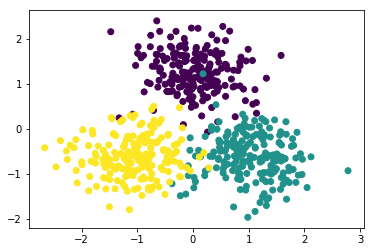

In [11]:
# adapted data generator code from lectures
def gen_gmm_data(n = 999, plot=False):
    # Fixing seed for repeatability
    np.random.seed(1)
    
    # Parameters of a normal distribuion
    mean_1 = [0, 2] ; mean_2 = [2, -2] ; mean_3 = [-2, -2]
    mean = [mean_1, mean_2, mean_3] ; cov = [[1, 0], [0, 1]]  
    
    # Setting up the class probabilities
    n_samples = n
    pr_class_1 = pr_class_2 = pr_class_3 = 1/3.0
    n_class = (n_samples * np.array([pr_class_1,pr_class_2, pr_class_3])).astype(int)
  
    # Generate sample data
    for i in range(3):
        x1,x2 = np.random.multivariate_normal(mean[i], cov, n_class[i]).T
        if (i==0):
            xs = np.array([x1,x2])
            cl = np.array([n_class[i]*[i]])
        else: 
            xs_new = np.array([x1,x2])
            cl_new = np.array([n_class[i]*[i]])
            xs = np.concatenate((xs, xs_new), axis = 1)
            cl = np.concatenate((cl, cl_new), axis = 1)
            
    # One hot encoding classes
    y = pd.Series(cl[0].tolist())
    y = pd.get_dummies(y).values 

    # Normalizing data (prevents overflow errors)     
    mu = xs.mean(axis = 1)
    std = xs.std(axis = 1)
    xs = (xs.T - mu) / std
    
    if plot:
        plt.scatter(xs[:,0], xs[:,1], c=np.argmax(y, axis=1))
    
    return xs, y, cl

# generate data with 600 observations
x, y, cl = gen_gmm_data(600, True)
# take the transpose of the data to match dimensions of this network
x1 = x.T
y1 = y.T

4.

Let's fit our network using Gradient Descent.

In [12]:
# computes the loss
def loss(y, y_hat):
    # cross entropy
    tot = y * np.log(y_hat)
    return -tot.sum()

# adapted gradient descent code from lectures
def grad_descent(x, y,starting_point=None, iterations=100, learning_rate=.01):
    if starting_point is not None:
        point = starting_point
    else:
        point = np.random.uniform(-.1,.1,size=26)
    
    trajectory = [point]
    losses = [loss(y, ff_nn_2_ReLu(x, *pack_params(point)))]
    
    for i in range(iterations):
        grad = grad_f(point, x, y)
        point = point - learning_rate * grad
        if not np.isfinite(point).all() or not np.isfinite(loss(y, ff_nn_2_ReLu(x, *pack_params(point)))).all():
            break
        trajectory.append(point)
        losses.append(loss(y, ff_nn_2_ReLu(x, *pack_params(point))))
    
    return np.array(trajectory), np.array(losses)

# plot loss at each iteration and classification results of fitted model
def plot_results(fig, ax, x, x1, losses):
        ax[0].scatter(x[:,0], x[:,1], c=np.argmax(ff_nn_2_ReLu(x1, *pack_params(traj[-1])), 
                                                  axis = 0))
        ax[1].plot(losses)
        ax[1].set_ylabel("Loss")
        ax[1].set_xlabel("Iteration")
        plt.show()

Below is a plot of the loss at each iteration as well as a plot of how the fitted model would classify our data for several different values of hyperparameters.

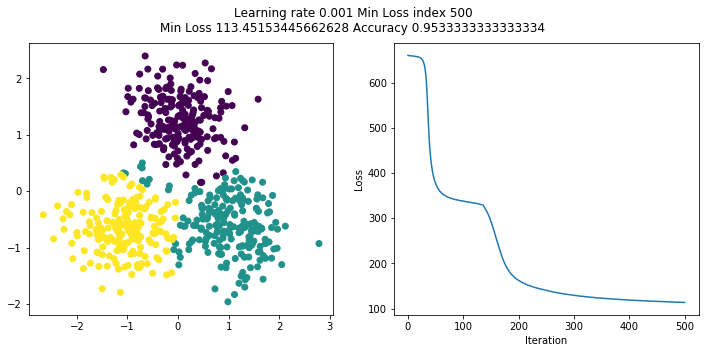

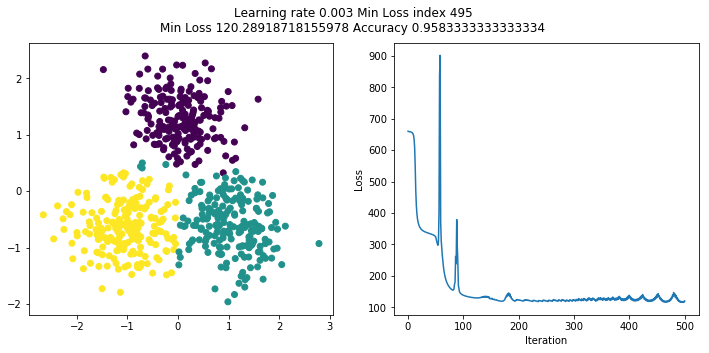

In [13]:
# test gradient descent with a couple learning rates
for l in [.001, .003]: 
    np.random.seed(1)
    point = np.random.uniform(-.2,.2,size=26)
    traj, losses = grad_descent(x1, y1, point, iterations=500, learning_rate=l)
        
    pred_probs = ff_nn_2_ReLu(x1, *pack_params(traj[-1]))
    acc = sum((np.argmax(pred_probs, axis=0) == cl)[0,:]) / cl.shape[1]
    if acc > .66:
            
        # plot loss at each iteration and classification results of fitted model
        fig, ax = plt.subplots(1,2, figsize=(12, 5))
        fig.suptitle("Learning rate "+str(l)+' Min Loss index '+str(np.argmin(losses))+
                     "\nMin Loss "+str(losses[-1])+" Accuracy "+str(acc))
        plot_results(fig, ax, x, x1, losses)

5.

Let's now fit our network using Gradient Descent with Momentum.

In [14]:
def grad_descent_with_momentum(x, y,starting_point=None, iterations=100, alpha=.01, epsilon=.1):
    if starting_point is not None:
        point = starting_point
    else:
        point = np.random.uniform(-.1,.1,size=26)
    
    trajectory = [point]
    losses = [loss(y, ff_nn_2_ReLu(x, *pack_params(point)))]
    
    v = np.zeros(np.array(point).shape)
    for i in range(iterations):
        grad = grad_f(point, x, y)
        v = alpha*v + epsilon*grad
        point = point - v
        if not np.isfinite(point).all() or not np.isfinite(loss(y, ff_nn_2_ReLu(x, *pack_params(point)))).all():
            break
        trajectory.append(point)
        losses.append(loss(y, ff_nn_2_ReLu(x, *pack_params(point))))
    
    return np.array(trajectory), np.array(losses)

Below is a plot of the loss at each iteration as well as a plot of how the fitted model would classify our data for several different values of hyperparameters.

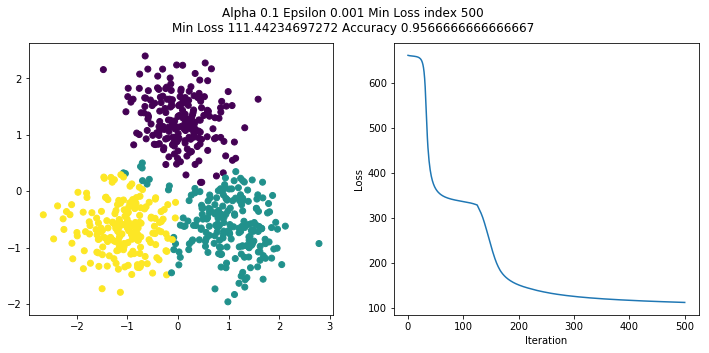

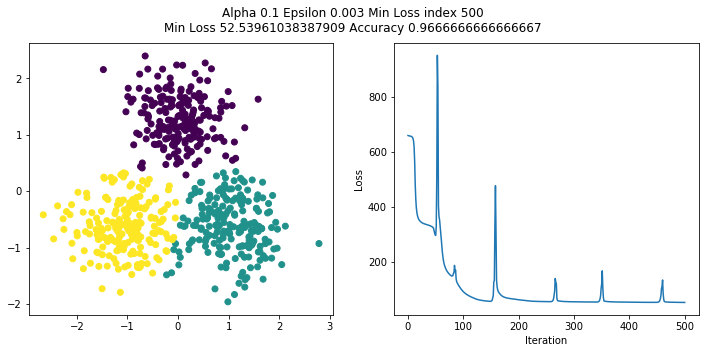

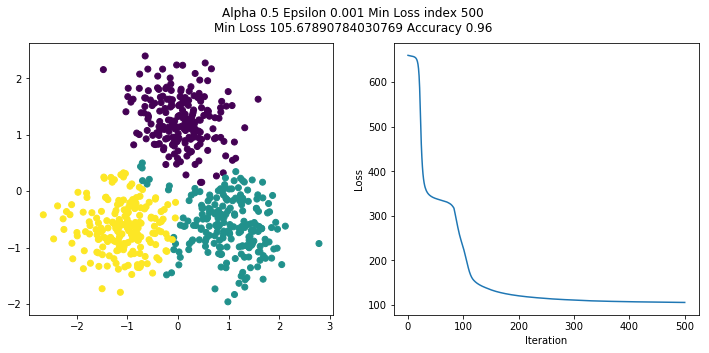

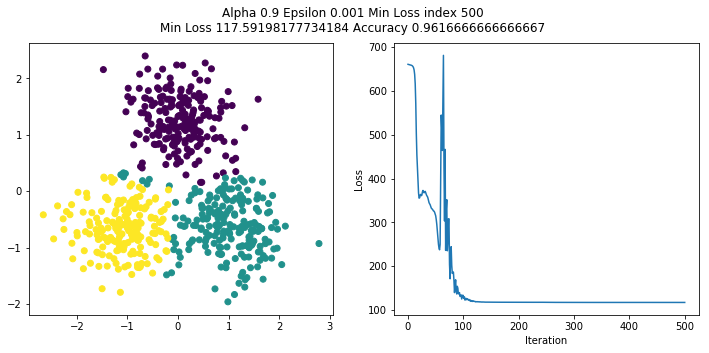

In [15]:
# test gradient descent with a several different hyperparameters
for a in [.1, .5, .9]:    
    for e in [.001, .003]:
        np.random.seed(1)
        point = np.random.uniform(-.2,.2,size=26)
        traj, losses = grad_descent_with_momentum(x1, y1, point, 500, alpha=a, epsilon=e)
        
        pred_probs = ff_nn_2_ReLu(x1, *pack_params(traj[-1]))
        acc = sum((np.argmax(pred_probs, axis=0) == cl)[0,:]) / cl.shape[1]
        if acc > .6:
            
            # plot loss at each iteration and classification results of fitted model
            fig, ax = plt.subplots(1,2, figsize=(12, 5))
            fig.suptitle("Alpha "+str(a)+" Epsilon "+str(e)+' Min Loss index '+str(np.argmin(losses))+
                    "\nMin Loss "+str(losses[-1])+" Accuracy "+str(acc))
            plot_results(fig, ax, x, x1, losses)

This algorithm seems to be able to reach a slightly smaller loss with the same amount of iterations. However, in addition to the 2 epsilons from before, we tested 3 different alpha values here, but only 2 of the 6 models achieved more than 90% accuracy. Most runs of this algorithm seem to have more trouble converging a small loss and experience spikes in loss.